# **Default payment prediction project**

In [168]:
from IPython.display import Image
Image(url='https://cdn.dribbble.com/users/957410/screenshots/3226085/dribbble-gif.gif')

## **Mục lục**:
1. Overview
2. Importing and Loading Dataset
3. Data cleaning
  * Handling missing values
  * Reconstructing Dataset
4. Exploratory Data Analysis
  * Data preparation
  * Categorical features
  * Numerical variables
5. Building model
  * Data Preparation
  * Modeling without imbalance resolve
  * Modeling with resampled data
  * Hyperparameters tuning
  * Retraining and Predicting


---



###**Đặt vấn đề**
Dataset "credit_card_clients.xls" là bộ dữ liệu được nhóm tác giả lựa chọn cho dự án. Bộ dữ liệu này chứa thông tin liên quan đến thanh toán và các đặc điểm của hơn 30,000 khách hàng trong khoảng thời gian từ tháng 4 đến tháng 9 của năm 2005. Nhiệm vụ bao gồm khám phá tập dữ liệu và tạo một mô hình đơn giản để phục vụ cho mục tiêu của dự án là dự đoán khả năng thanh toán khoản vay của khách hàng trong tháng tiếp theo (tháng 10/2005). 

Để thực hiện yêu cầu của đề bài, nhóm tác giả tiến hành xử lý bộ dữ liệu "credit_card_clients.xls" theo trình tự sau đây:

1. Tìm hiểu bộ dữ liệu.
2. Importing and Loading Data
3. Data Cleaning
4. Exploratory Data Analysis
5. Build Model (nhóm xây dựng model trong trường hợp dữ liệu imbalance và cả trường hợp resample dữ liệu)


---


### **Giải thích thuật ngữ**

Thuật ngữ "default payment" được hiểu là "không có khả năng thanh toán đúng hạn" hoặc "vi phạm nghĩa vụ thanh toán". Đây là tình trạng khi một người không thực hiện thanh toán đúng hạn theo thỏa thuận hoặc hợp đồng đã ký kết, dẫn đến việc phải trả một khoản phạt hoặc các khoản lãi suất phát sinh. Nếu trường hợp vi phạm này kéo dài thì có thể dẫn đến những hậu quả nghiêm trọng như mất tín nhiệm tại các tổ chức tín dụng và tăng nguy cơ nợ xấu. Như vậy, biến `default payment next month` với 2 giá trị (1,0) được hiểu là: 
  * 1: khách hàng không có khả năng thanh toán vào tháng tiếp theo 
  * 0: khách hàng có khả năng thanh toán vào tháng tiếp theo.


---



# **1. Overview**

Bộ dữ liệu này chứa thông tin về các khoản thanh toán mặc định, các yếu tố nhân khẩu học, dữ liệu tín dụng, lịch sử thanh toán và bảng sao kê hóa đơn của các khách hàng sử dụng thẻ tín dụng ở Heaven từ tháng 4 năm 2005 đến tháng 9 năm 2005.

Có tổng cộng 25 thuộc tính:

* `ID`: ID của mỗi khách hàng

* `LIMIT_BAL`: Số tiền tín dụng được cấp bằng Đài tệ (bao gồm cá nhân và gia đình/thẻ tín dụng phụ) 

* `SEX`: Giới tính 
  - 1 = male
  - 2 = female

* `EDUCATION`: Trình độ học vấn của khách hàng
  - 1 = graduate school 
  - 2 = university
  - 3 = high school 
  - 4 = others
  - 5 = unknown
  - 6 = unknown

* `MARRIAGE`: Tình trạng hôn nhân của khách hàng 
  - 1 = married
  - 2 = single 
  - 3 = others

* `AGE`: Tuổi

* `PAY_0`: Tình trạng trả nợ tháng 9/2005 
  - -1 = trả đúng hạn
  - 1 = trả chậm một tháng
  - 2 = trả chậm hai tháng
  -  … 
  - 8 = trả chậm tám tháng
  - 9 = trả chậm từ chín tháng trở lên

* `PAY_2`: Tình trạng trả nợ tháng 8/2005 (mô tả thành phần như trên)

* `PAY_3`: Tình trạng trả nợ tháng 7/2005 (mô tả thành phần như trên)

* `PAY_4`: Tình trạng trả nợ tháng 6/2005 (mô tả thành phần như trên)

* `PAY_5`: Tình trạng trả nợ tháng 5/2005 (mô tả thành phần như trên)

* `PAY_6`: Tình trạng trả nợ tháng 4/2005 (mô tả thành phần như trên)

* `BILL_AMT1`: Tổng sao kê hóa đơn tháng 9/2005 (Đài tệ)

* `BILL_AMT2`: Tổng sao kê hóa đơn tháng 8/2005 (Đài tệ)

* `BILL_AMT3`: Tổng sao kê hóa đơn tháng 7/2005 (Đài tệ)

* `BILL_AMT4`: Tổng sao kê hóa đơn tháng 6/2005 (Đài tệ)

* `BILL_AMT5`: Tổng sao kê hóa đơn tháng 5/2005 (Đài tệ)

* `BILL_AMT6`: Tổng sao kê hóa đơn tháng 3/2005 (Đài tệ)

* `PAY_AMT1`: Số tiền đã trả trước trong tháng 9/2005 (Đài tệ)

* `PAY_AMT2`: Số tiền đã trả trước trong tháng 8/2005 (Đài tệ)

* `PAY_AMT3`: Số tiền đã trả trước trong tháng 7/2005 (Đài tệ)

* `PAY_AMT4`: Số tiền đã trả trước trong tháng 6/2005 (Đài tệ)

* `PAY_AMT5`: Số tiền đã trả trước trong tháng 5/2005 (Đài tệ)

* `PAY_AMT6`: Số tiền đã trả trước trong tháng 4/2005 (Đài tệ)

* `default.payment.next.month`: Khách hàng không có khả năng thanh toán khoản nợ vào tháng 10/2005 
  - 1 = có
  - 0 = không

#**2. Importing and Loading Dataset**


## 2.1. Import thư viện

In [169]:
import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.under_sampling import NearMiss
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             average_precision_score, confusion_matrix,
                             recall_score, roc_auc_score, roc_curve, auc)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## 2.2. Load dataset

In [170]:
# Đọc tập dữ liệu
data = pd.read_excel('https://github.com/trangmx/fdc104/blob/main/datasets/credit_card/credit_card_clients.xls?raw=true', index_col = 0, header=1)

# Hiển thị 5 dòng đầu
data.head()

LIMIT_BAL  SEX  EDUCATION  \
ID                              
1       20000    2          2   
2      120000    2          2   
3       90000    2          2   
4       50000    2          2   
5       50000    1          2   

    MARRIAGE  AGE  PAY_0  PAY_2  \
ID                                
1          1   24      2      2   
2          2   26     -1      2   
3          2   34      0      0   
4          1   37      0      0   
5          1   57     -1      0   

    PAY_3  PAY_4  PAY_5  PAY_6  \
ID                               
1      -1     -1     -2     -2   
2       0      0      0      2   
3       0      0      0      0   
4       0      0      0      0   
5      -1      0      0      0   

    BILL_AMT1  BILL_AMT2  BILL_AMT3  \
ID                                    
1        3913       3102        689   
2        2682       1725       2682   
3       29239      14027      13559   
4       46990      48233      49291   
5        8617       5670      35835   

    BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID                                    
1           0          0          0   
2        3272       3455       3261   
3       14331      14948      15549   
4       28314      28959      29547   
5       20940      19146      19131   

    PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID                                 
1          0       689         0   
2          0      1000      1000   
3       1518      1500      1000   
4       2000      2019      1200   
5       2000     36681     10000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                 
1          0         0         0   
2       1000         0      2000   
3       1000      1000      5000   
4       1100      1069      1000   
5       9000       689       679   

    default payment next month  
ID                              
1                            1  
2                            1  
3                            0  
4                            0  
5                            0

In [171]:
#Thông tin về tập dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Tập dữ liệu gồm 24 trường biến và 3000 quan sát, các dữ liệu ở dạng interger

## 2.3. Options hiển thị Pandas

In [172]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)
pd.set_option('display.width', 40) 

# **3. Data Cleaning**

## **3.1. Handling missing values**

In [173]:
# Kiểm tra tổng giá trị NULL cho từng thuộc tính
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Kết quả cho thấy, các trường dữ liệu trong dataset không có giá trị null.

## <b>3.2. Reconstructing Dataset</b>

### Kiểm tra dạng dữ liệu của các biến

In [174]:
# Kiểm tra dạng dữ liệu của các biến
data.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

Các biến trong bộ dữ liệu đều ở dạng `int64`

### Đổi tên biến

Để thuận tiện cho việc xử lý dữ liệu ở các bước tiếp theo, nhóm tiến hành thay đổi tên của các cột "PAY_0" và "default payment next month"

In [175]:
# Đổi tên biến "PAY_0" thành "PAY_1"
data.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)
# Đổi tên biến "default payment next month" thành "default"
data = data.rename(columns={'default payment next month': 'default'})

data.head()

LIMIT_BAL  SEX  EDUCATION  \
ID                              
1       20000    2          2   
2      120000    2          2   
3       90000    2          2   
4       50000    2          2   
5       50000    1          2   

    MARRIAGE  AGE  PAY_1  PAY_2  \
ID                                
1          1   24      2      2   
2          2   26     -1      2   
3          2   34      0      0   
4          1   37      0      0   
5          1   57     -1      0   

    PAY_3  PAY_4  PAY_5  PAY_6  \
ID                               
1      -1     -1     -2     -2   
2       0      0      0      2   
3       0      0      0      0   
4       0      0      0      0   
5      -1      0      0      0   

    BILL_AMT1  BILL_AMT2  BILL_AMT3  \
ID                                    
1        3913       3102        689   
2        2682       1725       2682   
3       29239      14027      13559   
4       46990      48233      49291   
5        8617       5670      35835   

    BILL_AMT4  BILL_AMT5  BILL_AMT6  \
ID                                    
1           0          0          0   
2        3272       3455       3261   
3       14331      14948      15549   
4       28314      28959      29547   
5       20940      19146      19131   

    PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID                                 
1          0       689         0   
2          0      1000      1000   
3       1518      1500      1000   
4       2000      2019      1200   
5       2000     36681     10000   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  \
ID                                 
1          0         0         0   
2       1000         0      2000   
3       1000      1000      5000   
4       1100      1069      1000   
5       9000       689       679   

    default  
ID           
1         1  
2         1  
3         0  
4         0  
5         0

### Kiểm tra giá trị các trường dữ liệu

Tại bước này, nhóm sẽ tiến hành kiểm tra miền giá trị của các trường dữ liệu để so sánh bộ dữ liệu với phần description được cung cấp sẵn.

In [176]:
# Kiểm tra giá trị các trường dữ liệu
for col in data.columns:
  range = data[col].unique()
  range = np.sort(range)
  print(f'{col} ({len(range)} distinct values): {range} \n')

LIMIT_BAL (81 distinct values): [  10000   16000   20000   30000   40000   50000   60000   70000   80000
   90000  100000  110000  120000  130000  140000  150000  160000  170000
  180000  190000  200000  210000  220000  230000  240000  250000  260000
  270000  280000  290000  300000  310000  320000  327680  330000  340000
  350000  360000  370000  380000  390000  400000  410000  420000  430000
  440000  450000  460000  470000  480000  490000  500000  510000  520000
  530000  540000  550000  560000  570000  580000  590000  600000  610000
  620000  630000  640000  650000  660000  670000  680000  690000  700000
  710000  720000  730000  740000  750000  760000  780000  800000 1000000] 

SEX (2 distinct values): [1 2] 

EDUCATION (7 distinct values): [0 1 2 3 4 5 6] 

MARRIAGE (4 distinct values): [0 1 2 3] 

AGE (56 distinct values): [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72

Kết quả ở trên cho ta thấy được rằng, có một sự khác nhau về giá trị các biến của các trường ```EDUCATION```, ```MARRIAGE```, ```PAY_1```, ```PAY_2```,..., ```PAY_6``` so với data description.
Cụ thể là:
- ```EDUCATION```có giá trị [0,6] thay vì [1, 6] như trong mô tả
- ```MARRIAGE```có giá trị từ [0,3] thay vì [1,3] như trong mô tả
- Các trường ```PAY_1```, ```PAY_2```,..., ```PAY_6``` có giá trị [-2,8] khác với [-1,9] như trong mô tả

Do đó, nhóm đề xuất phương án giải quyết như sau:


Đối với `EDUCATION` & `MARRIAGE` 

Đầu tiên, hãy kiểm tra phân bố giá trị của 2 thuộc tính này

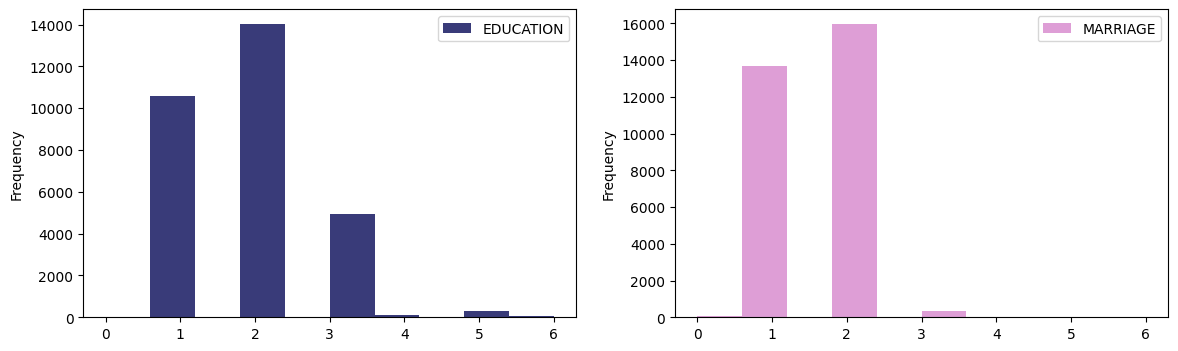

In [177]:
df = data[['EDUCATION','MARRIAGE']] 
# Đồ thị phân bổ giá trị của 2 thuốc tính EDUCATION và MARRIAGE
df.plot(kind = 'hist', 
        figsize = (14,4), 
        subplots = True, 
        ylabel = 'Count', 
        colormap = 'tab20b',
        layout=(1, len(df.columns)))

plt.show()

* ```EDUCATION```: 

Vì tần suất của những giá trị không xác định (0,5,6) là rất nhỏ, vậy nên nhóm sẽ đổi những giá trị này về 4 (others). Khi đó, miền giá trị của thuộc tính này sẽ là:
```
{ 
    1:'graduate school',
    2:'university',
    3:'high school',
    4:'others'
}
```
* ```MARRIAGE```: 

Tương tự, tần suất xuất hiện của giá trị 0 rất nhỏ, do đó nhóm quyết định biến đổi các giá trị bằng 0 thành 3 (others). Khi đó, miền giá trị của thuộc tính này sẽ là:
```
{ 
    1:'married',
    2:'single',
    3:'others'
}
```

In [178]:
# Thay các giá trị 0,5,6 ở biến EDUCATION bằng 4
data['EDUCATION'].replace([0,5,6], 4, inplace=True)

In [179]:
# Thay giá trị 0 bằng 3 ở biến MARRIAGE
data['MARRIAGE'].replace(0, 3, inplace=True)



Đối với `PAY_1`, `PAY_2`, ... , `PAY_6`

Đầu tiên, hãy kiểm tra phân bố giá trị của những thuộc tính này

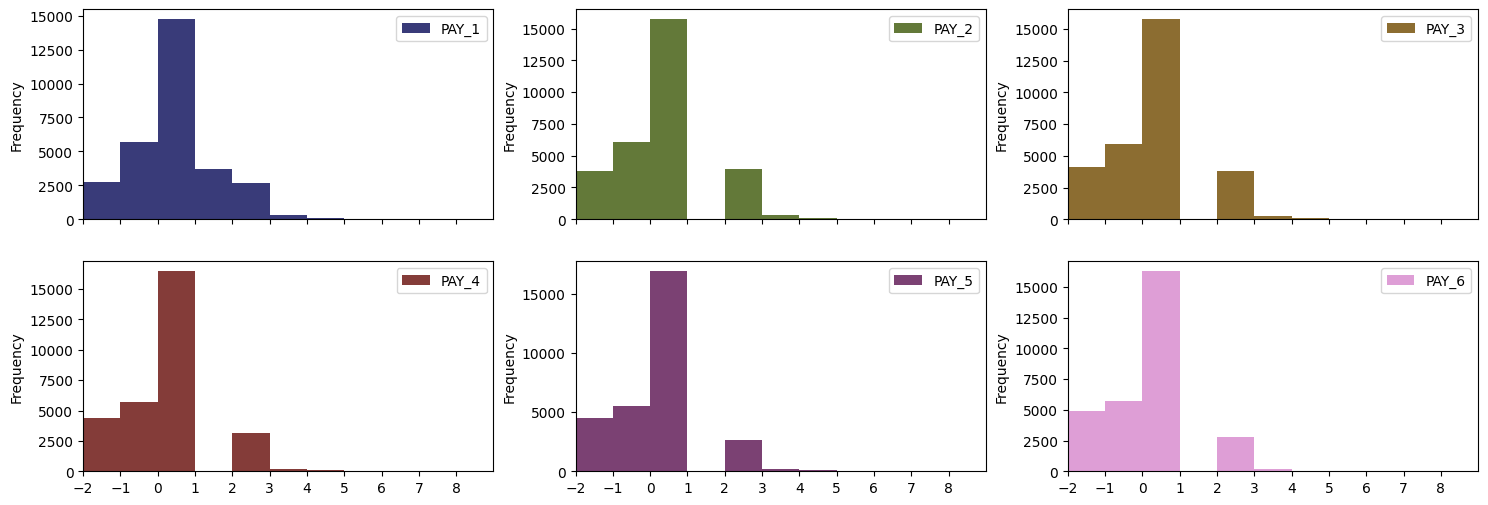

In [180]:
# Vẽ biểu đồ phân bổ giá trị của các thuộc tính PAY_1, PAY_2,..., PAY_6
my_lst = [f"PAY_{i}" for i in np.arange(1,7)]
df_pay = data[my_lst]

df_pay.plot(kind='hist',
            subplots=True,
            figsize = (18,6),
            xlim = (-2,9),
            xticks = np.arange(-2,9),
            ylabel='Count',
            colormap='tab20b',
            layout=(2,3))
plt.show()

Từ những biểu đồ phân bổ kể trên, ta có thể thấy rằng ở tất các các tháng, số lượng người thanh toán tín dụng đúng hạn chiếm phần lớn tỷ lệ khi so sánh với các giá trị còn lại. Do đó, ta có thể chuyển giá trị (-2,-1) thành 0 

In [181]:
# Thay thế các giá trị(-2,-1) thành 0 ở các trường PAY_1, PAY_2, ..., PAY_6
for col in my_lst: 
  data[col].replace([-2,-1,0], 0, inplace=True)

### Đổi đơn vị dữ liệu

Các dữ liệu về tiền tệ có đơn vị là Đài tệ, để việc sử dụng notebook linh hoạt hơn, nhóm quyết định đổi sang đơn vị USD

In [182]:
# Đổi đơn vị giá trị các trường từ BILL_AMT1 tới BILL_AMT6
for i in np.arange(data.columns.get_loc('BILL_AMT1'), data.columns.get_loc('default')):
  data.iloc[:,i] = data.iloc[:,i] * 0.032 

In [183]:
# Đổi đơn vị trường LIMIT_BAL
data['LIMIT_BAL'] = data['LIMIT_BAL'] * 0.032

# **4. Explorary Data Analysis**



## 4.1. Data describe

In [184]:
data.describe()

LIMIT_BAL           SEX  \
count  30000.000000  30000.000000   
mean    5359.498325      1.603733   
std     4151.925170      0.489129   
min      320.000000      1.000000   
25%     1600.000000      1.000000   
50%     4480.000000      2.000000   
75%     7680.000000      2.000000   
max    32000.000000      2.000000   

          EDUCATION      MARRIAGE  \
count  30000.000000  30000.000000   
mean       1.842267      1.557267   
std        0.744494      0.521405   
min        1.000000      1.000000   
25%        1.000000      1.000000   
50%        2.000000      2.000000   
75%        2.000000      2.000000   
max        4.000000      3.000000   

                AGE         PAY_1  \
count  30000.000000  30000.000000   
mean      35.485500      0.356767   
std        9.217904      0.760594   
min       21.000000      0.000000   
25%       28.000000      0.000000   
50%       34.000000      0.000000   
75%       41.000000      0.000000   
max       79.000000      8.000000   

              PAY_2         PAY_3  \
count  30000.000000  30000.000000   
mean       0.320033      0.304067   
std        0.801727      0.790589   
min        0.000000      0.000000   
25%        0.000000      0.000000   
50%        0.000000      0.000000   
75%        0.000000      0.000000   
max        8.000000      8.000000   

              PAY_4        PAY_5  \
count  30000.000000  30000.00000   
mean       0.258767      0.22150   
std        0.761113      0.71772   
min        0.000000      0.00000   
25%        0.000000      0.00000   
50%        0.000000      0.00000   
75%        0.000000      0.00000   
max        8.000000      8.00000   

              PAY_6     BILL_AMT1  \
count  30000.000000  30000.000000   
mean       0.226567   1639.146589   
std        0.715438   2356.347538   
min        0.000000  -5298.560000   
25%        0.000000    113.880000   
50%        0.000000    716.208000   
75%        0.000000   2146.912000   
max        8.000000  30864.352000   

          BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   
mean    1573.730405   1504.420954   
std     2277.560601   2219.180398   
min    -2232.864000  -5032.448000   
25%       95.512000     85.320000   
50%      678.400000    642.832000   
75%     2048.200000   1925.272000   
max    31485.792000  53250.848000   

          BILL_AMT4     BILL_AMT5  \
count  30000.000000  30000.000000   
mean    1384.414367   1289.964831   
std     2058.651396   1945.508985   
min    -5440.000000  -2602.688000   
25%       74.456000     56.416000   
50%      609.664000    579.344000   
75%     1744.192000   1606.096000   
max    28530.752000  29669.472000   

          BILL_AMT6      PAY_AMT1  \
count  30000.000000  30000.000000   
mean    1243.896333    181.234576   
std     1905.731441    530.024971   
min   -10867.296000      0.000000   
25%       40.192000     32.000000   
50%      546.272000     67.200000   
75%     1574.344000    160.192000   
max    30773.248000  27953.664000   

           PAY_AMT2      PAY_AMT3  \
count  30000.000000  30000.000000   
mean     189.477232    167.221808   
std      737.307853    563.422767   
min        0.000000      0.000000   
25%       26.656000     12.480000   
50%       64.288000     57.600000   
75%      160.000000    144.160000   
max    53896.288000  28673.280000   

           PAY_AMT4      PAY_AMT5  \
count  30000.000000  30000.000000   
mean     154.434460    153.580404   
std      501.317112    488.905782   
min        0.000000      0.000000   
25%        9.472000      8.080000   
50%       48.000000     48.000000   
75%      128.424000    129.008000   
max    19872.000000  13648.928000   

           PAY_AMT6       default  
count  30000.000000  30000.000000  
mean     166.896082      0.221200  
std      568.878905      0.415062  
min        0.000000      0.000000  
25%        3.768000      0.000000  
50%       48.000000      0.000000  
75%      128.000000      0.000000  
max    16917.312000      1.000000

Từ bảng kết quả ta quan sát thấy:
- Biến LIMIT_BAL có giá trị [320, 32000], giá trị min và max có sự chênh lệch lớn.
- Biến SEX có 2 giá trị là 1-male và 2-female trong đó phần lớn các quan sát có giá trị là 2
- Biến EDUCATION có giá trị nhỏ nhất là 1 và lớn nhất là 4, trung vị là 2 và các giá trị chủ yếu = 2 (University)
- Biến MARRIAGE có giá trị [1,3], phần lớn các quan sát có giá trị là 2 (single)
- Biến AGE có giá trị trong khoảng từ 21 đến 79, phần lớn dữ liệu có giá trị < 50, độ tuổi trung bình đạt 35,5
- Các biến PAY_i (với i = [1,6]) đều có giá trị từ 0 đến 8 và phần lớn các quan sát có giá trị bằng 0
- Các biến BILL_AMTi (i=[1,6]) có khoảng giá trị rất lớn, các quan sát có thể có giá trị âm hoặc dương
- Các biến PAY_AMTi (với i =[1,6]) đều có giá trị nhỏ nhất bằng 0, giá trị lớn nhất chênh lệch tương đối lớn so với giá trị min và đều > 13000
- Biến default có 2 giá trị là 0 và 1, dễ dàng quan sát thấy phần lớn các quan sát có giá trị = 0

## 4.2. Categorical features

#### `Marriage`

In [185]:
# Đếm số giá trị khác biệt của biến MARRIAGE
marriage_count = data['MARRIAGE'].value_counts().reset_index().rename(columns={'index':'index','MARRIAGE':'count'})

In [186]:
# đổi tên các trường 
marriage_count['index'][1]= 'Marriaged'
marriage_count['index'][0]= 'Single'
marriage_count['index'][2]= 'Others'

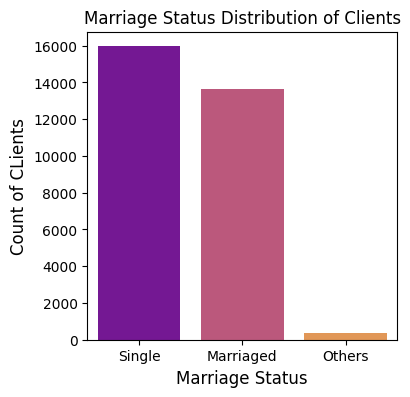

In [187]:
# biểu đồ phân loại theo tình trạng hôn nhân 
plt.figure(figsize = (4,4))
sns.barplot(x=marriage_count['index'], y = marriage_count['count'], data=data, palette='plasma').set_title('Marriage Status Distribution of Clients')
plt.xlabel("Marriage Status", fontsize= 12)
plt.ylabel("Count of CLients", fontsize= 12)
plt.show()

Từ biểu đồ, ta rút ra nhận xét các khách hàng ở tình trạng độc thân chiếm tỷ lệ lớn nhất (khoảng gần 16000 người), khoảng gần 14000 khách hàng đã kết hôn và còn lại một phần vô cùng nhỏ khách hàng có tình trạng hôn nhân là "khác".

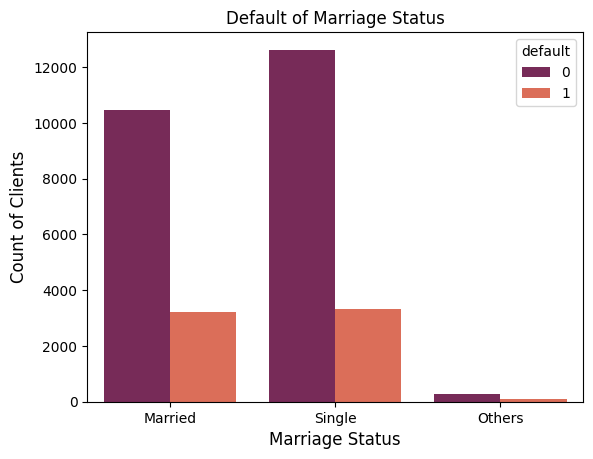

In [188]:
# vẽ biểu đồ thể hiện khả năng default đối với từng nhóm khách hàng theo tình trạng hôn nhân 
sns.countplot(data = data, x = 'MARRIAGE', hue="default", palette = 'rocket').set_title('Default of Marriage Status')
plt.xlabel("Marriage Status", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.xticks([0,1,2],['Married', 'Single', 'Others'])
plt.show()

Đối với những khách hàng độc thân và đã kết hôn, số lượng khách hàng có default = 1 ở 2 trường hợp này xấp xỉ bằng nhau tuy nhiên khách hàng độc thân có khả năng trả nợ vào tháng tới cao hơn so với khách hàng đã kết hôn.

Khách hàng có default = 1 và default = 0 trong trường hợp tình trạng hôn nhân "khác" không có sự chênh lệch quá lớn về số lượng

#### `Education`

In [189]:
# Đếm tần suất của các giá trị khác biệt của biến EDUCATION
edu_count = data['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})


In [190]:
# đổi tên theo thứ tự 
edu_count['index'][0] = 'University'
edu_count['index'][1] = 'Graduate School'
edu_count['index'][2] = 'High school'
edu_count['index'][3] = 'Others'

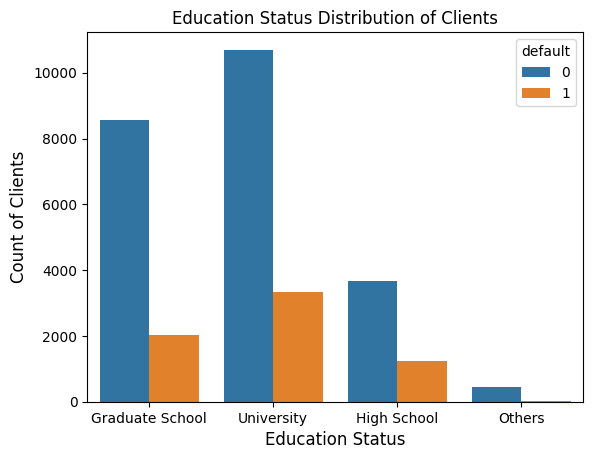

In [191]:
# vẽ biểu đồ thể hiện khả năng default đối với từng trình độ học vấn khác nhau
sns.countplot(data = data, x = 'EDUCATION', hue="default", palette = 'tab10').set_title('Education Status Distribution of Clients')
plt.xlabel("Education Status", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'])
plt.show()

Hầu hết tất cả khách hàng đều có trình độ giáo dục tốt. Khách hàng có trình độ đại học chiếm tỷ lệ lớn nhất sau đó là tôt nghiệp cấp ba và đang là học sinh cấp ba, chỉ một lượng nhỏ ở nhóm khác ( có thể là ở trình độ thấp hơn 3 nhóm kể trên).

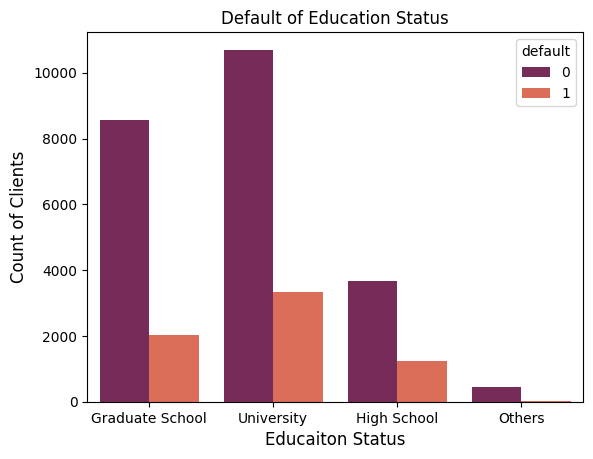

In [192]:
# vẽ biểu đồ thể hiện khả năng default đối với từng trình độ học vấn khác nhau
sns.countplot(data = data, x = 'EDUCATION', hue="default", palette = 'rocket').set_title('Default of Education Status')
plt.xlabel("Educaiton Status", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.xticks([0,1,2,3],['Graduate School','University','High School','Others'])
plt.show()

 Xét phân phối default theo trình độ học vấn, ta có thể thấy số lượng khách hàng default = 0 có xu hướng tăng theo trình độ học vấn (tức là trình độ học vấn càng cao thì càng nhiều khách hàng có default = 0)

#### Gender

In [193]:
# Đếm số lần xuất hiện của các giá trị khác biệt trong biến "SEX"
sex_count = data['SEX'].value_counts().reset_index().rename(columns={'index':'index','SEX':'count'})

In [194]:
# Đổi tên cột theo thứ tự
sex_count['index'][1] = 'Male'
sex_count['index'][0] = 'Female'

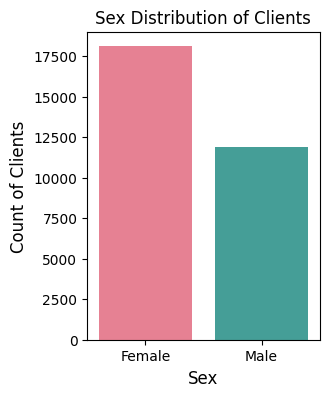

In [195]:
# biểu đồ phân loại giới tính trong bộ dữ liệu
plt.figure(figsize = (3,4))
sns.barplot(x=sex_count['index'], y = sex_count['count'], data=data, palette='husl').set_title('Sex Distribution of Clients')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.show()

Nhìn vào biểu đồ ta có thể thấy lượng khách hàng là nữ gấp lượng khách hàng nam khoảng 1,5 lần

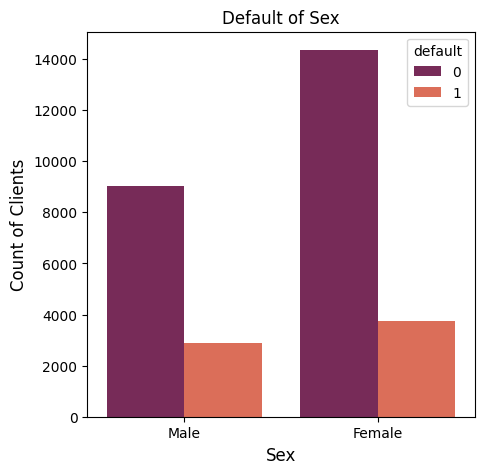

In [196]:
# vẽ biểu đồ thể hiện khả năng default đối với từng giới tính
plt.figure(figsize = (5,5))
sns.countplot(data = data, x = 'SEX', hue="default", palette = 'rocket').set_title('Default of Sex')
plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.xticks([0,1],['Male', 'Female'])
plt.show()

So sánh tỷ lệ default = 1 và default = 0 ở 2 giới tính nam và nữ, có thể thấy nam giới có khả năng default cao hơn nữ giới.

## 4.3. Numerical variables

#### Age

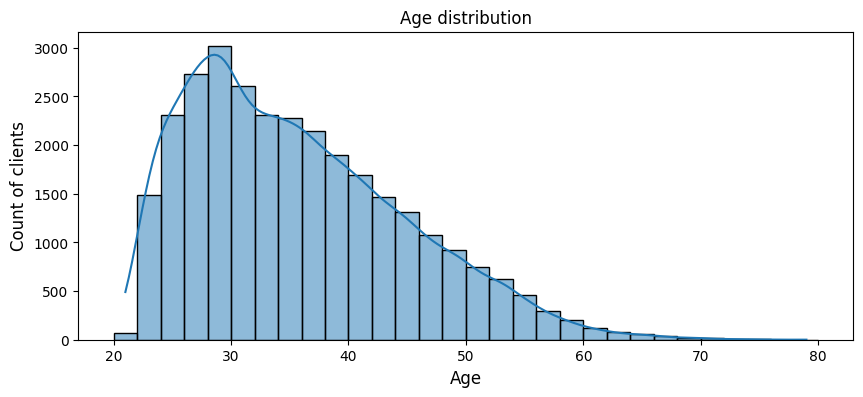

In [197]:
# vẽ biểu đồ thể hiện phân phối theo độ tuổi
plt.figure(figsize = (10,4))
sns.histplot(data=data, x = 'AGE', kde = True, bins=np.arange(20,81,2))
plt.title("Age distribution")
plt.xlabel("Age", fontsize= 12)
plt.ylabel("Count of clients", fontsize= 12)
plt.show()

Quan sát biểu đồ, ta thấy khách hàng có độ tuổi tương đối trẻ, phần lớn < 50, đồ thị phân phối lệch sang bên phải.

In [198]:
# Nhóm theo độ tuổi
data['AgeBin'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AgeBin'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AgeBin, dtype: int64


In [199]:
# show default theo nhóm tuổi
data['default'].groupby(data['AgeBin']).value_counts(normalize = True)

AgeBin    default
(20, 25]  0          0.733402
          1          0.266598
(25, 30]  0          0.798516
          1          0.201484
(30, 35]  0          0.805728
          1          0.194272
(35, 40]  0          0.783811
          1          0.216189
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 80]  0          0.731618
          1          0.268382
Name: default, dtype: float64

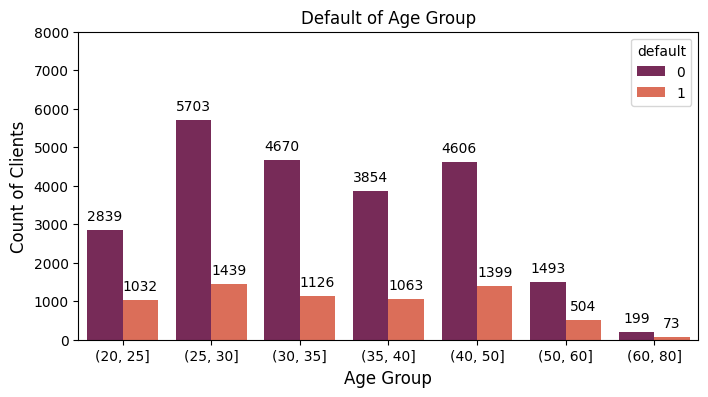

In [200]:
# vẽ đồ thị thể hiện default theo nhóm tuổi
plt.figure(figsize=(8,4))


data['AgeBin'] = data['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']


ax = sns.countplot(data = data, x = 'AgeBin', hue="default", palette = 'rocket', order = AgeBin_order)


plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.title("Default of Age Group")
plt.ylim(0,8000)


for p in ax.patches:
    ax.annotate(  str(int(p.get_height())), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', 
                  va='center', 
                  xytext=(0, 10), 
                  textcoords='offset points')


plt.show()


Từ đồ thị, ta rút ra nhận xét như sau:
- Nhìn chung default = 0 có xu hướng giảm theo độ tuổi. Số lượng khách hàng có default = 0  cao nhất ở dộ tuổi 25-30 và thấp nhất ở độ tuổi 60-80
- Số lượng khách hàng có default = 1 ở các nhóm tuổi có giá trị khá tương đồng
- Số lượng khách hàng default cao nhất thuộc độ tuổi 25-30 và thấp nhất ở độ tuổi 60-80. Tuy nhiên nếu so sánh về tỷ lệ default =1 và default =0 ở các nhóm tuổi thi khả năng default thấp nhất là ở độ tuổi từ 25-30, trong khi khả năng cao nhất xảy ra ở độ tuổi 60 trở lên

#### Bill amount

In [201]:
# Lấy ra tên các cột từ cột BILL_AMT1 tới default)
money_lst = [data.columns[i] 
             for i in np.arange(
                 data.columns.get_loc('BILL_AMT1'), 
                 data.columns.get_loc('default'
                 ))
             ]
print(money_lst)
print(len(money_lst))

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
12


In [202]:
def kde_plot(columns, title):
  # Set the color palette for the curves
  colors = ['blue', 'green', 'red', 'purple', 'orange', 'gray']

  # Create a figure and axes
  fig, ax = plt.subplots(figsize = (12,6))

  # Plot the KDE curves
  for i, column in enumerate(columns):
      sns.kdeplot(data[column], color=colors[i], ax=ax, label=column, bw_method = 0.6)

  # Set the legend
  ax.legend()

  # Set the title and labels
  ax.set_title(title)
  ax.set_xlabel('Values')
  ax.set_ylabel('Density')

  # Show the plot
  plt.show()

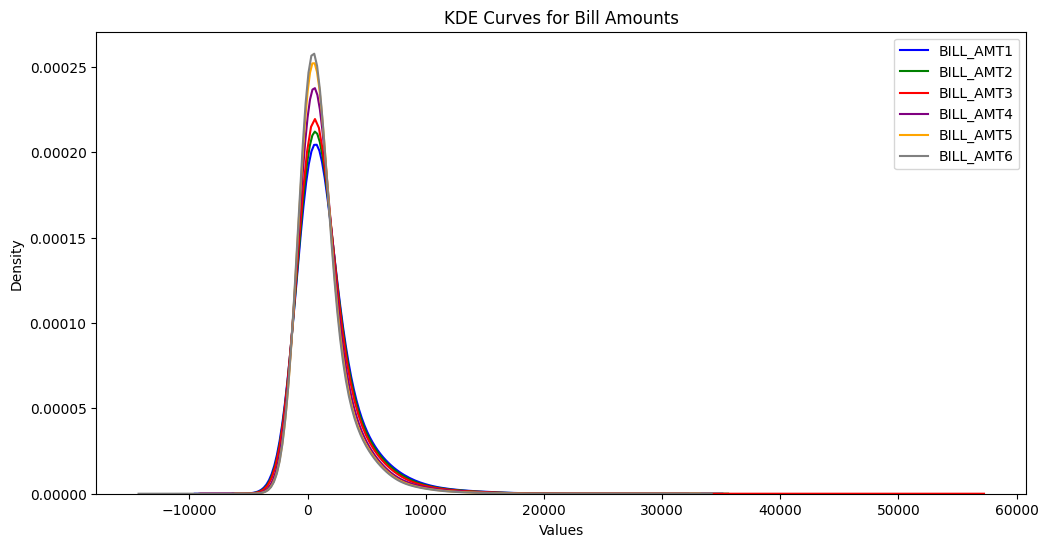

In [203]:
kde_plot(['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], 'KDE Curves for Bill Amounts')

Các biến BILL_AMTi (với i=[1,6]) có đồ thị lệch phảỉ.

#### Previous payment

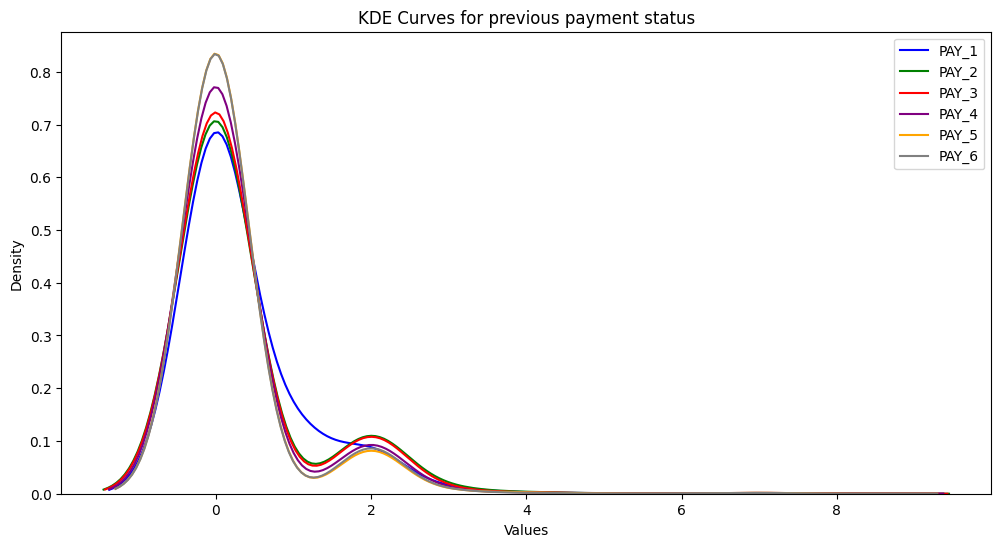

In [207]:
kde_plot(['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'KDE Curves for previous payment status')

Từ đồ thị biểu diễn phân phối của các biến PAY_i (với i= [1,6]), đồ thị phân phối lệch sang bên phải và phần lớn các quan sát có giá trị bằng 0.

#### Amount given credit ( LIMIT_BAL)

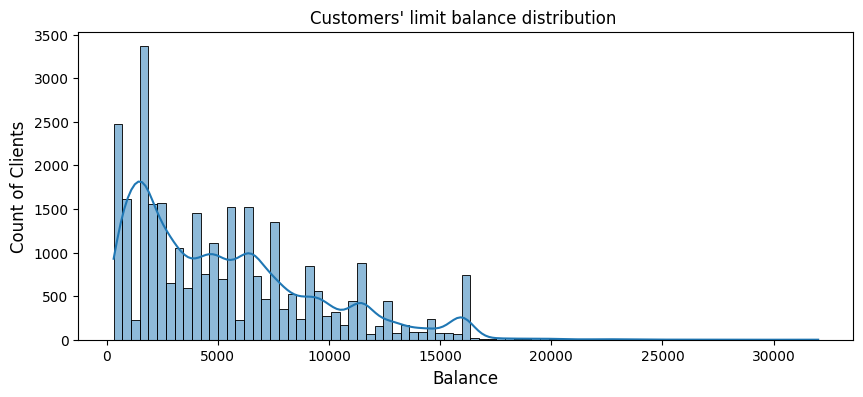

In [205]:
# vẽ biểu đồ thể hiện phân phối theo độ tuổi
plt.figure(figsize = (10,4))
sns.histplot(data=data, x = 'LIMIT_BAL', kde = True)
plt.title("Customers' limit balance distribution ")
plt.xlabel("Balance", fontsize= 12)
plt.ylabel("Count of Clients", fontsize= 12)
plt.show()

Đồ thị biểu diễn LIMIT_BAL lệch phải, các giá trị tập trung chủ yếu trong khoảng từ 0 tới < 10000

#### Target column

In [206]:
target_count = data['default'].value_counts().reset_index().rename(columns={'index':'index','default':'count'})
fig = go.Figure(go.Bar(
    x = target_count['index'],y = target_count['count'],text=target_count['count'],marker={'color': target_count['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Biểu đồ phân phối giá trị default',xaxis_title="Default",yaxis_title="Số lượng", height = 600, width = 500)
fig.show()

Từ bộ dữ liệu có 30.000 credit cards của người dùng,có thể thấy nhãn 0 chiếm đa số, trong khi đó chỉ có 6.636 nhãn 1 cho thấy khả năng default chiếm tỷ lệ khoảng 22,1%. Phân phối 2 giá trị 0 và 1 của biến default có sự chênh lệch tương đối lớn.

# **5. Building model**

## **5.1 Data Preparation**

### Drop những cột không cần thiết

In [ ]:
# Những cột cần drop
columns_to_drop = ['AgeBin']

In [ ]:
data.drop(columns = columns_to_drop, axis = 1, inplace = True)

In [ ]:
# Chia dữ liệu thành tập biến và tập nhãn
X = data.drop(['default'], axis=1)
y = data['default']

In [ ]:
# Train Test split:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 42)

### Scale dữ liệu

Ta sẽ tiến hành Robust Scale để giảm thiểu ảnh hưởng của outlier 

In [ ]:
#Các biến cần scale
columns_to_scale = ['LIMIT_BAL', 'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                    'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

categorical_columns = ['SEX','EDUCATION','MARRIAGE','AGE'] + [f'PAY_{i}' for i in np.arange(1,7)]

#Tạo các dataframe với các cột là categorical columns
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

In [ ]:
#Khởi tạo Scaler
scaler = RobustScaler()
#Áp dụng Robust Scale
X_train_scaled = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled = scaler.transform(X_test[columns_to_scale])

In [ ]:
#Chuyển X_train và X_test về định dạng DataFrame sau khi scale:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_scale)

#Kiểm tra 
X_test_scaled

LIMIT_BAL  BILL_AMT1  \
0      -0.578947  -0.212975   
1       0.052632   1.787799   
2      -0.368421   0.745510   
3      -0.052632  -0.028125   
4      -0.473684   1.122690   
...          ...        ...   
11995  -0.473684   0.388468   
11996   1.894737  -0.341028   
11997  -0.210526   1.058538   
11998   0.894737  -0.274467   
11999  -0.473684   0.358755   

       BILL_AMT2  BILL_AMT3  \
0      -0.183055  -0.149532   
1       1.713946   1.682624   
2       0.785525   0.843203   
3      -0.037090  -0.069501   
4       0.433578   0.387025   
...          ...        ...   
11995   0.446576   0.486527   
11996  -0.330234  -0.325124   
11997   1.154162   1.264291   
11998  -0.327264  -0.324009   
11999   0.281738   0.343271   

       BILL_AMT4  BILL_AMT5  \
0      -0.122138  -0.091725   
1       1.561367   1.217539   
2       0.959322   1.061511   
3      -0.040460  -0.142439   
4       0.010158   0.042811   
...          ...        ...   
11995   0.568299   0.619275   
11996  -0.324875  -0.297036   
11997   1.420276   0.726327   
11998  -0.355556  -0.397278   
11999   0.155505   0.193808   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      -0.048447 -0.148680 -0.005732   
1       1.246435  0.590018  0.539390   
2       1.100181  0.081638  0.265488   
3      -0.211956 -0.121467 -0.052561   
4       0.047182 -0.024986 -0.127683   
...          ...       ...       ...   
11995   0.670296  0.174655  0.240122   
11996  -0.253082 -0.247387 -0.225244   
11997   0.781915  0.519265  0.457683   
11998  -0.398984 -0.204342 -0.110122   
11999   0.237569 -0.099202  0.032317   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     -0.071284  0.000000 -0.003157   
1      0.323393  0.305724  0.304434   
2      0.285137  0.250017  0.259966   
3      1.238921 -0.392617  1.446915   
4     -0.190091  0.079963 -0.397842   
...         ...       ...       ...   
11995  0.240466  0.133271  0.128404   
11996  0.071997  0.266542  0.128404   
11997  0.488060  0.133271  0.128404   
11998 -0.370678 -0.141267 -0.397842   
11999 -0.142569 -0.130606 -0.029470   

       PAY_AMT6  
0      0.129870  
1      0.303636  
2      0.273766  
3      0.755325  
4     -0.129870  
...         ...  
11995  0.129870  
11996  0.129870  
11997  0.129870  
11998  1.320779  
11999 -0.137662  

[12000 rows x 13 columns]

Sau khi đã scale xong, ta sẽ tiến hành gộp lại để tập Train và tập Test đầy đủ các cột như ban đầu

In [ ]:
X_train = pd.concat([X_train_scaled,X_train_cat.reset_index(drop=True)], axis = 1)
X_test = pd.concat([X_test_scaled,X_test_cat.reset_index(drop=True)], axis = 1)

Ta cũng cần gộp lại thành 1 `data_train` gồm biến và nhãn để drop outliers

In [ ]:
# Gộp lại thành tập dữ liệu train để xử lí outlier
data_train = pd.concat([X_train, y_train.to_frame().reset_index(drop=True)], axis = 1)

In [ ]:
data_train

LIMIT_BAL  BILL_AMT1  \
0       0.315789  -0.344032   
1      -0.105263   0.465622   
2       0.736842  -0.322314   
3      -0.578947  -0.134335   
4       1.631579   0.371899   
...          ...        ...   
17995  -0.473684   0.469393   
17996   0.315789   2.106914   
17997  -0.473684  -0.351667   
17998  -0.368421   0.805234   
17999   0.105263  -0.351980   

       BILL_AMT2  BILL_AMT3  \
0      -0.333779  -0.342905   
1       0.302433  -0.004166   
2      -0.303615  -0.318709   
3      -0.095877  -0.070042   
4       0.183334   0.188562   
...          ...        ...   
17995   0.531473   0.620231   
17996   2.385820   2.583894   
17997  -0.348189  -0.351412   
17998   0.808633   0.540270   
17999  -0.348517  -0.287959   

       BILL_AMT4  BILL_AMT5  \
0      -0.350865  -0.372207   
1      -0.186924  -0.082748   
2      -0.324610  -0.333845   
3      -0.065145  -0.046900   
4       0.197062   0.241516   
...          ...        ...   
17995   0.698363   0.225688   
17996   2.745500   3.084312   
17997  -0.360096  -0.372207   
17998   0.304257   0.213317   
17999  -0.304579  -0.339427   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      -0.316254 -0.302554 -0.374512   
1      -0.275771 -0.130126 -0.054512   
2      -0.317188  0.152143 -0.035976   
3      -0.008441 -0.024986 -0.176463   
4       0.061077 -0.124188 -0.173780   
...          ...       ...       ...   
17995  -0.229066 -0.024986  0.238171   
17996   3.212941  2.819964  0.969878   
17997  -0.355970 -0.519760 -0.493537   
17998   0.225541  0.222401 -0.005732   
17999  -0.062944 -0.519760  0.399146   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0     -0.311750 -0.399813  0.106039   
1     -0.071284  3.331779  0.654651   
2      0.018059  0.100220  0.094198   
3     -0.427706 -0.249484 -0.108407   
4      0.047523 -0.133271  0.128404   
...         ...       ...       ...   
17995 -0.049661 -0.380622 -0.099461   
17996 -0.427706  1.599254  1.180897   
17997 -0.427706 -0.399813 -0.397842   
17998  0.641559 -0.079963 -0.397842   
17999  0.317215  0.039981  3.338508   

        PAY_AMT6  SEX  EDUCATION  \
0      -0.363636    2          1   
1       0.350649    1          1   
2       2.277143    2          2   
3      -0.129870    2          1   
4      -0.221558    2          1   
...          ...  ...        ...   
17995  18.680779    1          2   
17996   0.649351    1          1   
17997  -0.389610    1          1   
17998  -0.077922    2          2   
17999   0.000000    2          2   

       MARRIAGE  AGE  PAY_1  PAY_2  \
0             2   23      0      0   
1             2   38      0      0   
2             2   37      0      0   
3             2   26      1      2   
4             2   30      0      0   
...         ...  ...    ...    ...   
17995         2   32      0      0   
17996         2   37      2      2   
17997         2   26      0      0   
17998         2   25      0      0   
17999         1   36      0      0   

       PAY_3  PAY_4  PAY_5  PAY_6  \
0          0      0      0      0   
1          0      0      0      0   
2          0      0      0      0   
3          2      2      0      0   
4          0      0      0      0   
...      ...    ...    ...    ...   
17995      0      0      0      0   
17996      2      2      2      2   
17997      0      0      0      0   
17998      0      0      2      2   
17999      0      0      0      0   

       default  
0            0  
1            0  
2            0  
3            1  
4            1  
...        ...  
17995        0  
17996        1  
17997        0  
17998        1  
17999        1  

[18000 rows x 24 columns]

### Xử lí outlier

Trước tiên, hãy xem xét tình trạng của các biến continuous:

Với biến `LIMIT_BAL`

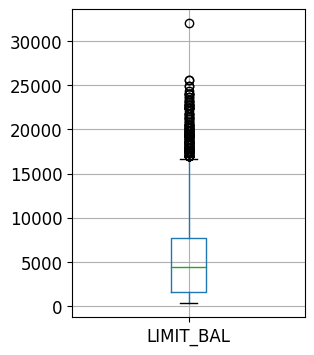

In [ ]:
data[["LIMIT_BAL"]].boxplot(figsize=(3,4), fontsize=12)
plt.show()

Với các biến `BILL_AMT` từ 1 đến 6: 

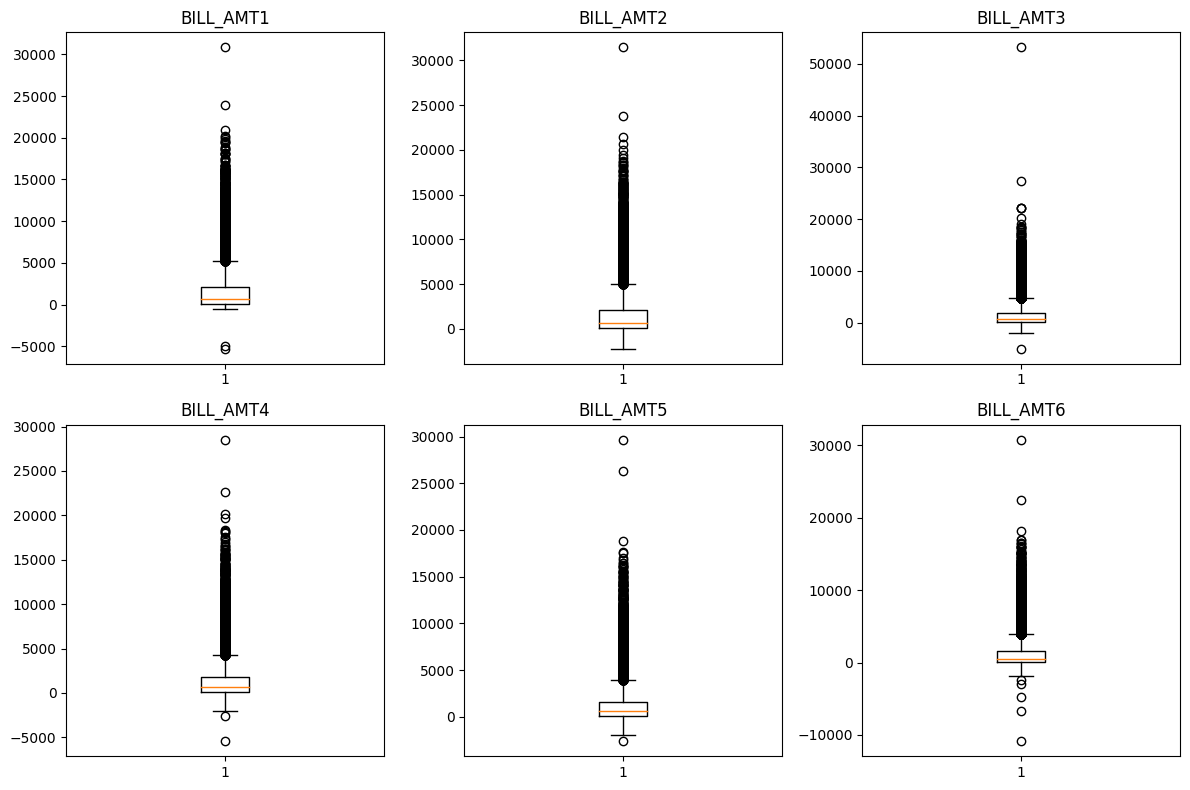

In [ ]:
columns_bill = [f'BILL_AMT{i}' for i in np.arange(1, 7)]

def box_plot_columns(columns, data):
  # Create a figure and axes for the box plots
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

  # Iterate over the columns and plot the box plots
  for i, column in enumerate(columns):
      ax = axes[i // 3, i % 3]  # Select the current axis
      ax.boxplot(data[column])  # Plot the box plot
      ax.set_title(column)  # Set the title for the subplot

  # Adjust spacing between subplots
  plt.tight_layout()

  # Show the plot
  plt.show()

box_plot_columns(columns_bill,data)

Với các biến `PAY_AMT` từ 1 đến 6: 

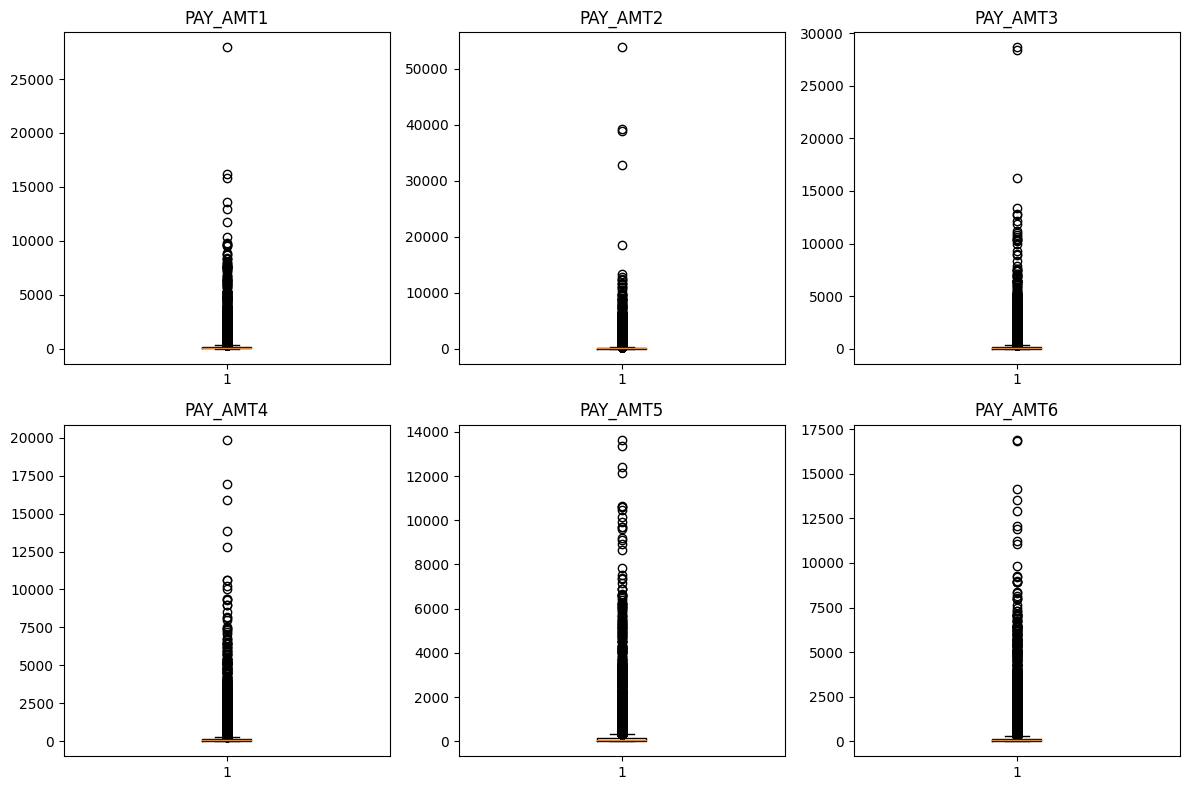

In [ ]:
columns_pay = [f'PAY_AMT{i}' for i in np.arange(1, 7)]
box_plot_columns(columns_pay,data)

* Nhìn qua các đồ thị, ta thấy được hầu như ở tất cả các biến giá trị đều tồn tại outlier, và ta cần phải xử lí chúng để mô hình dự đoán không bị ảnh hưởng. Ta sẽ tiến hành kiểm tra số lượng outlier và drop hết những giá trị này

* Có một điều nữa ta cần phải lưu ý, đó là ta chỉ drop outlier trên bộ dữ liệu của tập TRAIN

In [ ]:
def remove_outliers(data: pd.DataFrame, feat: str):
    feat_fraud = data[feat]
    q25, q75 = np.percentile(feat_fraud, 25), np.percentile(feat_fraud, 75)
    iqr = q75 - q25
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in feat_fraud if x < lower or x > upper]
    print(f'Số điểm bất thường cho thuộc tính {feat} trong tập data_train: {len(outliers)}')

    return data.drop(data[(data[feat] > upper) | (data[feat] < lower)].index)

In [ ]:
columns_to_drop_outliers = ['LIMIT_BAL'] + [f'BILL_AMT{i}' for i in np.arange(1,7)] + [f'PAY_AMT{i}' for i in np.arange(1, 7)]

for col in columns_to_drop_outliers:
  data_train = remove_outliers(data_train, col)

Số điểm bất thường cho thuộc tính LIMIT_BAL trong tập data_train: 98
Số điểm bất thường cho thuộc tính BILL_AMT1 trong tập data_train: 1402
Số điểm bất thường cho thuộc tính BILL_AMT2 trong tập data_train: 832
Số điểm bất thường cho thuộc tính BILL_AMT3 trong tập data_train: 436
Số điểm bất thường cho thuộc tính BILL_AMT4 trong tập data_train: 643
Số điểm bất thường cho thuộc tính BILL_AMT5 trong tập data_train: 540
Số điểm bất thường cho thuộc tính BILL_AMT6 trong tập data_train: 285
Số điểm bất thường cho thuộc tính PAY_AMT1 trong tập data_train: 1403
Số điểm bất thường cho thuộc tính PAY_AMT2 trong tập data_train: 951
Số điểm bất thường cho thuộc tính PAY_AMT3 trong tập data_train: 852
Số điểm bất thường cho thuộc tính PAY_AMT4 trong tập data_train: 582
Số điểm bất thường cho thuộc tính PAY_AMT5 trong tập data_train: 657
Số điểm bất thường cho thuộc tính PAY_AMT6 trong tập data_train: 571


Kiểm tra lại về outliers

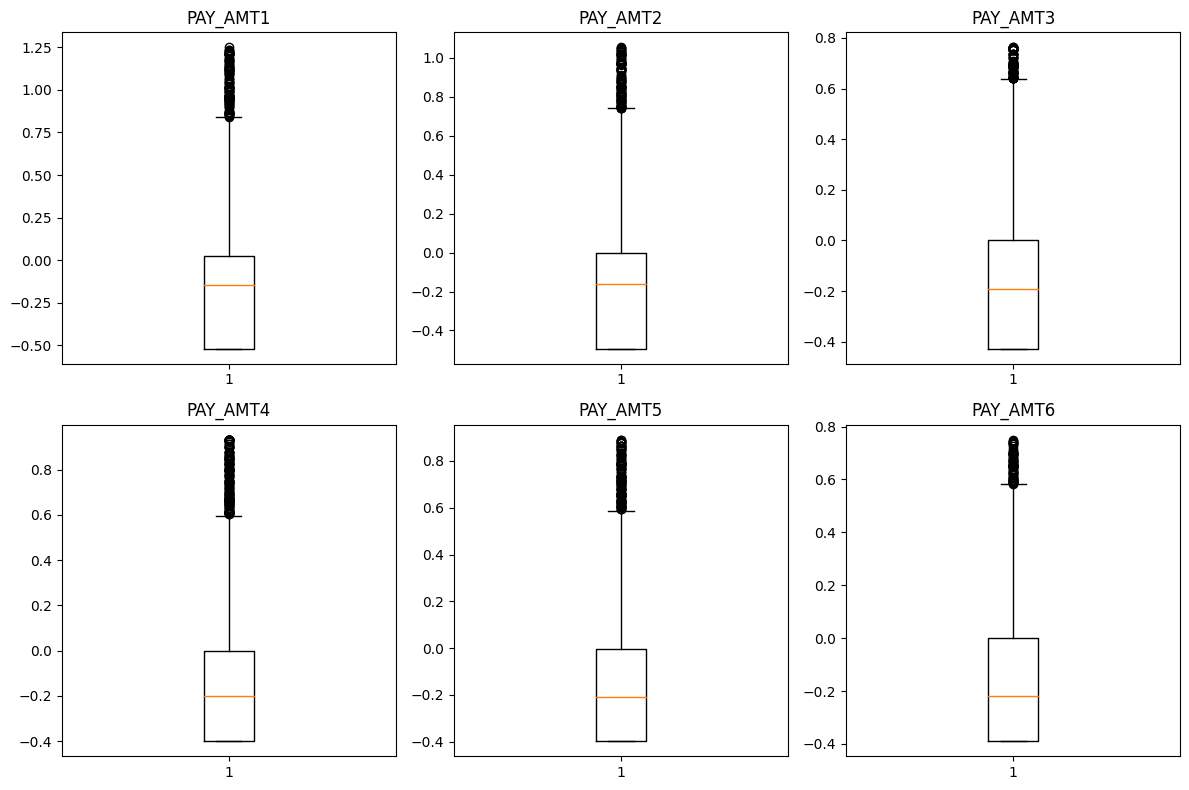

In [ ]:
columns_pay = [f'PAY_AMT{i}' for i in np.arange(1, 7)]
box_plot_columns(columns_pay,data_train)

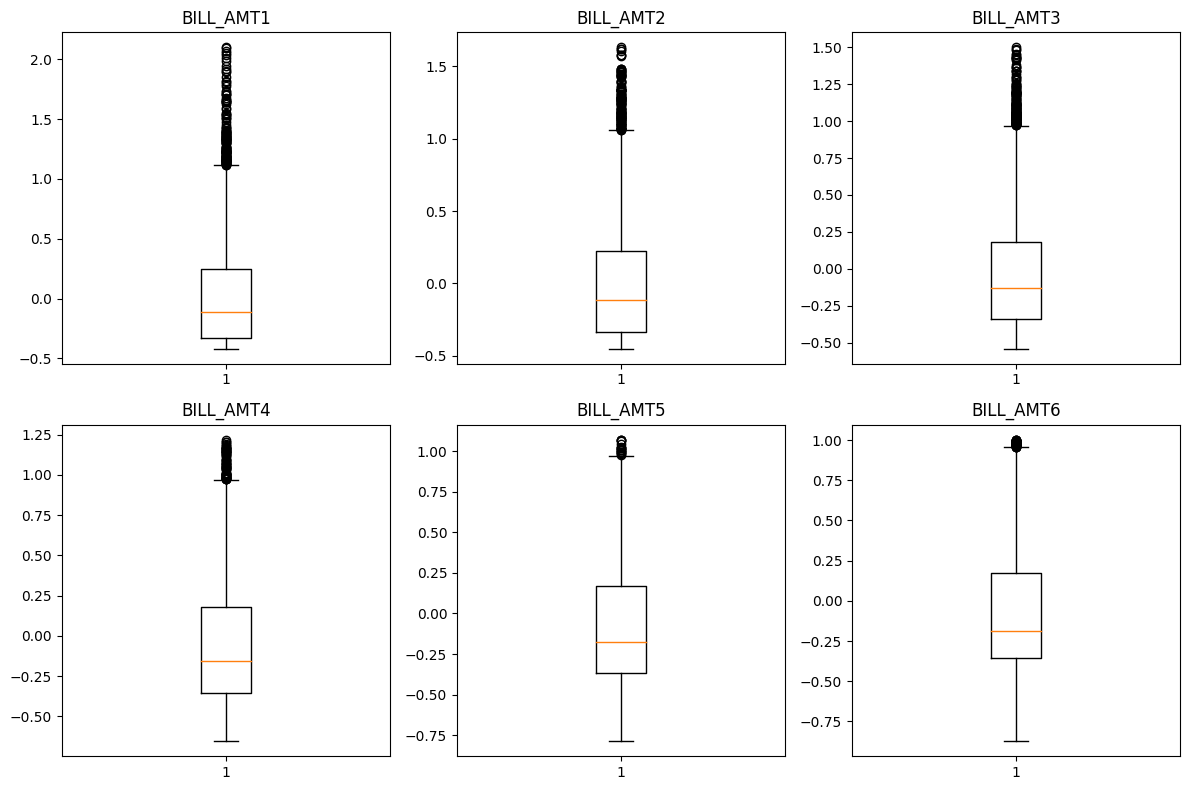

In [ ]:
columns_pay = [f'BILL_AMT{i}' for i in np.arange(1, 7)]
box_plot_columns(columns_pay,data_train)

Nhìn chung, hầu hết outlier đã được xóa bỏ khỏi `data_train`, còn lại một số ít không đáng kể sẽ là những điểm quan trọng cho quá trình dự đoán

## 5.2 Modeling without imbalance resolve

In [ ]:
# Tiến hành chia lại tập biến và tập nhãn:
X_train = data_train.drop('default', axis = 1)
y_train = data_train['default']

Ta sẽ train một số model với tham số mặc định

In [ ]:
def predictProcess(model_type, X_train, X_test, y_train, y_test, **kwargs):
    # Check if model_type is valid
    if model_type not in ('KNN', 'SVC','RandomForest','XGB','Logistic'):
        raise ValueError('Choose one of these models: KNN, SVC, RandomForest, XGB, Logistic')
    
    # Getting the model
    if model_type == 'KNN':
        model = KNeighborsClassifier()
    elif model_type == 'RandomForest':
        model = RandomForestClassifier()
    elif model_type == 'SVC':
        model = SVC()
    elif model_type == 'XGB':
        model = XGBClassifier()
    elif model_type == 'Logistic':
        model = LogisticRegression()

    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    return y_pred_train, y_pred_test
  
def confusion_heat(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true,y_pred)
    ax.set_title(title)
    plt.figure(figsize = (4,4))
    sns.heatmap(cm, cmap = 'Greens', linecolor = 'black', linewidth = 1, 
                annot = True, fmt = '', ax = ax)

Prediting by classifier: KNN ....
Time consumed: 2.427715301513672


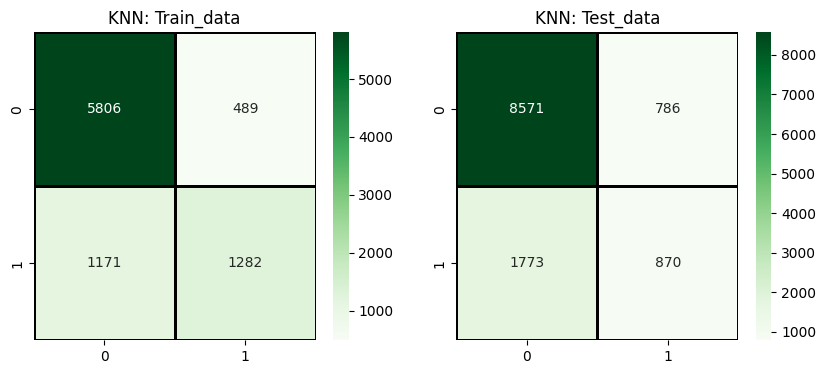

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

--------------------
Prediting by classifier: SVC ....
Time consumed: 14.027998924255371


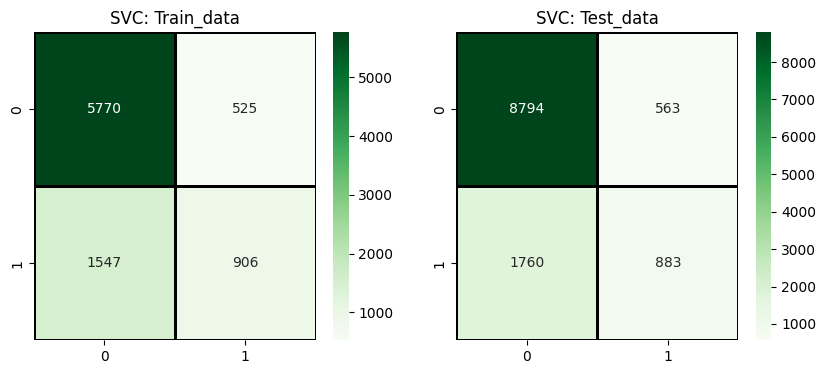

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

--------------------
Prediting by classifier: RandomForest ....
Time consumed: 2.1818292140960693


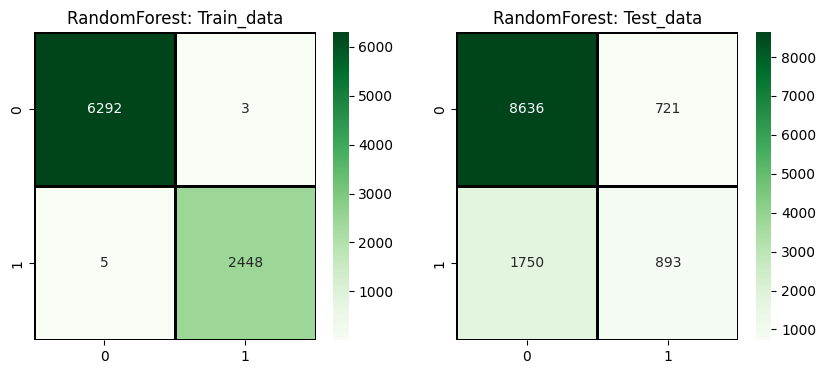

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

--------------------
Prediting by classifier: XGB ....
Time consumed: 1.3470745086669922


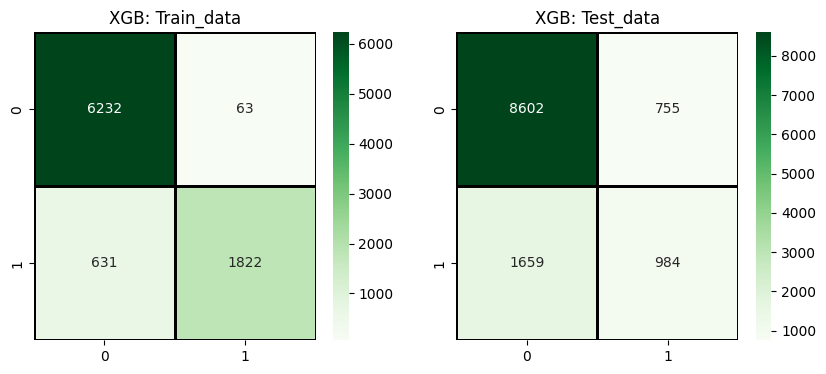

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

--------------------
Prediting by classifier: Logistic ....
Time consumed: 0.09206700325012207


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


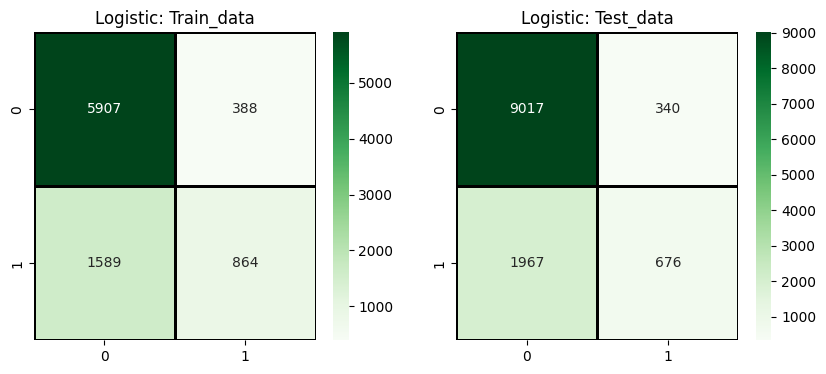

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

--------------------


In [ ]:
classifiers = ['KNN','SVC','RandomForest','XGB','Logistic']
metrics_result = {}

for classifier in classifiers: 
  time_start = time.time()
  print(f'Prediting by classifier: {classifier} ....')
  y_pred_train, y_pred_test = predictProcess(classifier, X_train, X_test, y_train, y_test)
  print(f'Time consumed: {time.time() - time_start}')

  # Metrics
  acc_train = accuracy_score(y_train, y_pred_train) 
  acc_test = accuracy_score(y_test, y_pred_test)  
  pre_train = precision_score(y_train, y_pred_train)
  pre_test = precision_score(y_test, y_pred_test)
  re_train = recall_score(y_train, y_pred_train)
  re_test = recall_score(y_test, y_pred_test)
  f1_train = f1_score(y_train, y_pred_train)
  f1_test = f1_score(y_test, y_pred_test)

  # Confusion matrix
  fig, axs = plt.subplots(1,2, figsize = (10,4))
  confusion_heat(y_train, y_pred_train, axs[0], f'{classifier}: Train_data')
  confusion_heat(y_test, y_pred_test, axs[1], f'{classifier}: Test_data')
  plt.show()

  # Store metrics
  if classifier not in metrics_result:
    metrics_result[classifier] = [acc_train, acc_test, pre_train, pre_test, re_train, re_test, f1_train, f1_test]
  
  print('-' * 20)

Tổng hợp kết quả chạy được ta thu được bảng sau

In [ ]:
metric_df = pd.DataFrame(metrics_result,  index = ['acc_train', 'acc_test', 'precision_train', 'precision_test', 'recall_train', 'recall_test', 'f1_train', 'f1_test'])
metric_df

KNN       SVC  \
acc_train        0.810242  0.763146   
acc_test         0.786750  0.806417   
precision_train  0.723885  0.633124   
precision_test   0.525362  0.610650   
recall_train     0.522625  0.369344   
recall_test      0.329171  0.334090   
f1_train         0.607008  0.466529   
f1_test          0.404745  0.431890   

                 RandomForest  \
acc_train            0.999086   
acc_test             0.794083   
precision_train      0.998776   
precision_test       0.553284   
recall_train         0.997962   
recall_test          0.337874   
f1_train             0.998369   
f1_test              0.419544   

                      XGB  Logistic  
acc_train        0.920668  0.774005  
acc_test         0.798833  0.807750  
precision_train  0.966578  0.690096  
precision_test   0.565842  0.665354  
recall_train     0.742764  0.352222  
recall_test      0.372304  0.255770  
f1_train         0.840018  0.466397  
f1_test          0.449110  0.369500

Có thể thấy rằng, với một số mô hình vừa thử nghiệm trên tập data bị imbalance, các mô hình chưa hoạt động chưa ổn định


## 5.3 Modeling with resampled dataset

---



- Hàm dưới đây sẽ tiến hành chia tập train thành các folds, sau đó tiến hành upsampling cho tập train và đánh giá metric `precision` cho mỗi iteration

- Trong mỗi iteration, ta cũng tiến hành luôn đồng thời robust scale rồi min max scale (`fit_transform` trên tập train, `transform` trên tập evaluate)

- Kết quả trả về là kết quả: accuracy, precision, recall và f1_score tương ứng với từng fold

In [ ]:
def score_model(model, X_train, y_train, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation (precision) scores
    """
    if cv is None:
        cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    smoter = SMOTE(random_state=42)
    
    scores = []

    X_train.reset_index(drop=True, inplace=True)  # Reset indices of X_train
    y_train.reset_index(drop=True, inplace=True)  # Reset indices of y_train

    num_fold = 0

    for train_fold_index, val_fold_index in cv.split(X_train, y_train):
        num_fold += 1
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train[train_fold_index]

        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train[val_fold_index]

        # Robust scale
        X_train_fold_scaled = scaler.fit_transform(X_train_fold[columns_to_scale])
        X_val_fold_scaled = scaler.transform(X_val_fold[columns_to_scale])

        # Upsample only the data in the training section
        X_train_fold_scaled_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold_scaled,
                                                                                   y_train_fold)
        # Fit the model on the upsampled training data
        model_obj = model().fit(X_train_fold_scaled_upsample, y_train_fold_upsample)
        
        # Prediction
        y_pred_fold = model_obj.predict(X_val_fold_scaled)

        # Score the mean of metrics on the (non-upsampled) validation data
        acc = accuracy_score(y_val_fold, y_pred_fold)
        pre = precision_score(y_val_fold, y_pred_fold)
        recall = recall_score(y_val_fold, y_pred_fold)
        f1 = f1_score(y_val_fold, y_pred_fold)
        scores.append({f'fold_{num_fold}':[acc,pre,recall,f1]})

    return scores


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
score_model(LogisticRegression, X_train, y_train, cv=None)

[{'fold_1': [0.5531111111111111,
   0.29653505237711525,
   0.7352647352647352,
   0.422624174562159]},
 {'fold_2': [0.5297777777777778,
   0.2754032258064516,
   0.6816367265469062,
   0.392303273980471]},
 {'fold_3': [0.5468888888888889,
   0.2879345603271984,
   0.7025948103792415,
   0.4084711343196983]},
 {'fold_4': [0.5508888888888889,
   0.2929703372612759,
   0.719560878243513,
   0.4164019636153624]},
 {'fold_5': [0.5402222222222223,
   0.28736548425667596,
   0.719560878243513,
   0.41070919965821706]}]

In [ ]:
score_model(RandomForestClassifier, X_train, y_train, cv=None)

[{'fold_1': [0.7555555555555555,
   0.44761904761904764,
   0.4225774225774226,
   0.4347379239465571]},
 {'fold_2': [0.7506666666666667,
   0.43788819875776397,
   0.4221556886227545,
   0.4298780487804878]},
 {'fold_3': [0.7528888888888889,
   0.43861607142857145,
   0.39221556886227543,
   0.41412012644889357]},
 {'fold_4': [0.7555555555555555,
   0.44638949671772427,
   0.40718562874251496,
   0.42588726513569936]},
 {'fold_5': [0.7504444444444445,
   0.4379487179487179,
   0.42614770459081835,
   0.4319676277187658]}]

In [ ]:
score_model(XGBClassifier, X_train, y_train, cv=None)

[{'fold_1': [0.7511111111111111,
   0.43539630836047777,
   0.4005994005994006,
   0.4172736732570239]},
 {'fold_2': [0.7446666666666667,
   0.42729970326409494,
   0.4311377245508982,
   0.42921013412816694]},
 {'fold_3': [0.7431111111111111,
   0.41630434782608694,
   0.38223552894211577,
   0.39854318418314255]},
 {'fold_4': [0.7466666666666667,
   0.4228187919463087,
   0.3772455089820359,
   0.39873417721518994]},
 {'fold_5': [0.7464444444444445,
   0.4287179487179487,
   0.4171656686626746,
   0.42286292362164896]}]

In [ ]:
score_model(SVC, X_train, y_train, cv=None)

[{'fold_1': [0.558,
   0.30612244897959184,
   0.7792207792207793,
   0.4395604395604396]},
 {'fold_2': [0.5488888888888889,
   0.2968379446640316,
   0.7495009980039921,
   0.4252548131370329]},
 {'fold_3': [0.5706666666666667,
   0.3072139303482587,
   0.7395209580838323,
   0.4340949033391916]},
 {'fold_4': [0.5526666666666666,
   0.30043426766679826,
   0.7594810379241517,
   0.4305516265912305]},
 {'fold_5': [0.564, 0.309674861221253, 0.779441117764471, 0.4432463110102156]}]

Với các mô đồ đã thử nghiệm sau khi đã oversampling bằng `SMOTE`, ta thấy được Random Forest Classifier hoạt động ổn nhất trong các classifer được thử với tham số mặc định

## 5.4 Hyperparameters tunning

Vì giới hạn về điều kiện nên ta sẽ dùng random search để tìm kiếm siêu tham số tốt nhất của Random Forest

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'oob_score': [False, True]
}

In [ ]:
grid_no_up = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, cv=5, 
                          scoring='precision').fit(X_train, y_train)

grid_no_up.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

0.5081221929936274

In [ ]:
grid_no_up.best_params_

{'oob_score': False,
 'n_estimators': 200,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.1,
 'max_leaf_nodes': 5,
 'max_features': 'sqrt',
 'max_depth': 5,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

## 5.5 Retraining and Predicting

In [ ]:
final_model = RandomForestClassifier(**grid_no_up.best_params_)

final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)

y_test_pred = final_model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
pre_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

acc_test = accuracy_score(y_test, y_test_pred)
pre_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

In [ ]:
print(acc_train)
print(acc_test)

0.7808444444444445
0.778


In [ ]:
print(pre_train)
print(pre_test)

0.5076500588466065
0.488953488372093


In [ ]:
print(recall_train)
print(recall_test)

0.5166699940107806
0.5169022741241549


In [ ]:
print(f1_train)
print(f1_test)

0.5121203126545958
0.5025395876904691


Hãy xem xét phân phối của các giá trị được dự đoán trên dữ liệu huấn luyện/kiểm tra.

In [ ]:
def distribution_plot(ax, x_value, y_value, x_label, y_label, title):
    """
    Params:
     :x_value(array): 
     :y_value(array):
     :x_label(str): 
     :y_label(str):
     :title(str):
    
    Returns
    """
    sns.kdeplot(x_value, color="r", label=x_label, ax=ax)
    sns.kdeplot(y_value, color="b", label=y_label, ax=ax)

    ax.set_title(title)
    ax.legend()

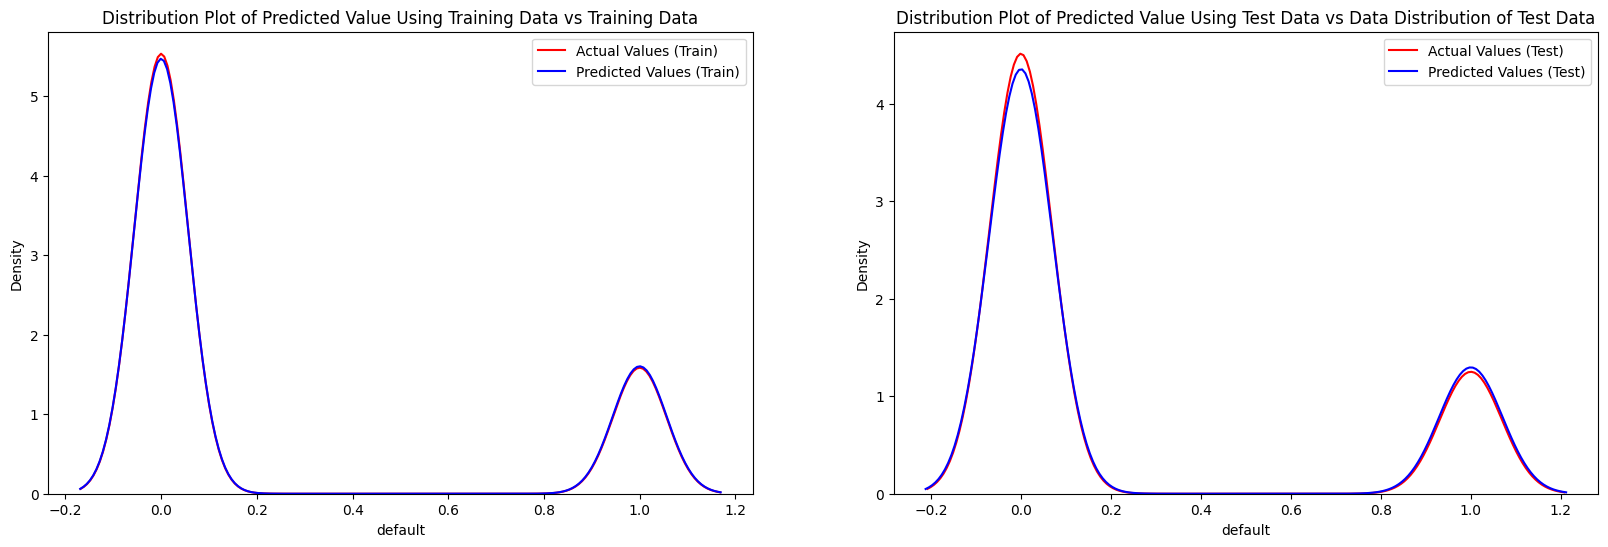

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
title1 = 'Distribution Plot of Predicted Value Using Training Data vs Training Data'
distribution_plot(axs[0], y_train, y_train_pred, "Actual Values (Train)", "Predicted Values (Train)", title1)

title2 = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(axs[1], y_test, y_test_pred, "Actual Values (Test)","Predicted Values (Test)", title2)
plt.show()